In [ ]:
!pip install pyspark


In [ ]:
from google.colab import files
files.upload()


Saving kidney_disease.csv to kidney_disease.csv


{'kidney_disease.csv': b'id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification\n0,48.0,80.0,1.02,1.0,0.0,,normal,notpresent,notpresent,121.0,36.0,1.2,,,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd\n1,7.0,50.0,1.02,4.0,0.0,,normal,notpresent,notpresent,,18.0,0.8,,,11.3,38,6000,,no,no,no,good,no,no,ckd\n2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,,,9.6,31,7500,,no,yes,no,poor,no,yes,ckd\n3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd\n4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,,,11.6,35,7300,4.6,no,no,no,good,no,no,ckd\n5,60.0,90.0,1.015,3.0,0.0,,,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd\n6,68.0,70.0,1.01,0.0,0.0,,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,,,no,no,no,good,no,no,ckd\n7,24.0,,1.015,2.0,4.0,normal,abnormal,notpre

In [ ]:
!pip install pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CKD_Prediction").getOrCreate()


In [ ]:
from google.colab import files
files.upload()


Saving kidney_disease.csv to kidney_disease (1).csv


{'kidney_disease (1).csv': b'id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification\n0,48.0,80.0,1.02,1.0,0.0,,normal,notpresent,notpresent,121.0,36.0,1.2,,,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd\n1,7.0,50.0,1.02,4.0,0.0,,normal,notpresent,notpresent,,18.0,0.8,,,11.3,38,6000,,no,no,no,good,no,no,ckd\n2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,,,9.6,31,7500,,no,yes,no,poor,no,yes,ckd\n3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd\n4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,,,11.6,35,7300,4.6,no,no,no,good,no,no,ckd\n5,60.0,90.0,1.015,3.0,0.0,,,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd\n6,68.0,70.0,1.01,0.0,0.0,,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,,,no,no,no,good,no,no,ckd\n7,24.0,,1.015,2.0,4.0,normal,abnormal,no

In [ ]:
df = spark.read.csv("kidney_disease.csv", header=True, inferSchema=True)
df.show(5)
df.printSchema()


+---+----+----+-----+---+---+------+--------+----------+----------+-----+----+---+-----+----+----+---+----+----+---+---+---+-----+---+---+--------------+
| id| age|  bp|   sg| al| su|   rbc|      pc|       pcc|        ba|  bgr|  bu| sc|  sod| pot|hemo|pcv|  wc|  rc|htn| dm|cad|appet| pe|ane|classification|
+---+----+----+-----+---+---+------+--------+----------+----------+-----+----+---+-----+----+----+---+----+----+---+---+---+-----+---+---+--------------+
|  0|48.0|80.0| 1.02|1.0|0.0|  NULL|  normal|notpresent|notpresent|121.0|36.0|1.2| NULL|NULL|15.4| 44|7800| 5.2|yes|yes| no| good| no| no|           ckd|
|  1| 7.0|50.0| 1.02|4.0|0.0|  NULL|  normal|notpresent|notpresent| NULL|18.0|0.8| NULL|NULL|11.3| 38|6000|NULL| no| no| no| good| no| no|           ckd|
|  2|62.0|80.0| 1.01|2.0|3.0|normal|  normal|notpresent|notpresent|423.0|53.0|1.8| NULL|NULL| 9.6| 31|7500|NULL| no|yes| no| poor| no|yes|           ckd|
|  3|48.0|70.0|1.005|4.0|0.0|normal|abnormal|   present|notpresent|117.0|56.

In [ ]:
# Check nulls
from pyspark.sql.functions import col

df.select([col(c).isNull().alias(c) for c in df.columns]).show()

# Drop rows with nulls for simplicity
df = df.dropna()

# Convert class labels (ckd/notckd) to numeric
from pyspark.sql.functions import when

df = df.withColumn("label", when(df["classification"] == "ckd", 1).otherwise(0))



+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--------------+
|   id|  age|   bp|   sg|   al|   su|  rbc|   pc|  pcc|   ba|  bgr|   bu|   sc|  sod|  pot| hemo|  pcv|   wc|   rc|  htn|   dm|  cad|appet|   pe|  ane|classification|
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--------------+
|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|         false|
|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|         false|
|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|         false

In [ ]:
df.printSchema()


root
 |-- id: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- bp: double (nullable = true)
 |-- sg: double (nullable = true)
 |-- al: double (nullable = true)
 |-- su: double (nullable = true)
 |-- rbc: string (nullable = true)
 |-- pc: string (nullable = true)
 |-- pcc: string (nullable = true)
 |-- ba: string (nullable = true)
 |-- bgr: double (nullable = true)
 |-- bu: double (nullable = true)
 |-- sc: double (nullable = true)
 |-- sod: double (nullable = true)
 |-- pot: double (nullable = true)
 |-- hemo: double (nullable = true)
 |-- pcv: string (nullable = true)
 |-- wc: string (nullable = true)
 |-- rc: string (nullable = true)
 |-- htn: string (nullable = true)
 |-- dm: string (nullable = true)
 |-- cad: string (nullable = true)
 |-- appet: string (nullable = true)
 |-- pe: string (nullable = true)
 |-- ane: string (nullable = true)
 |-- classification: string (nullable = true)
 |-- label: integer (nullable = false)



In [ ]:
from pyspark.sql.functions import col

df = df.withColumn("pcv", col("pcv").cast("float"))
df = df.withColumn("wc", col("wc").cast("float"))
df = df.withColumn("rc", col("rc").cast("float"))


In [ ]:
from pyspark.ml.feature import VectorAssembler

# Choose relevant numeric features
features = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv']

assembler = VectorAssembler(inputCols=features, outputCol="features")
data = assembler.transform(df).select("features", "label")

# Train-test split
train, test = data.randomSplit([0.8, 0.2], seed=42)


In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()
model = lr.fit(train)

# Predictions
predictions = model.transform(test)
predictions.select("features", "label", "prediction").show(5)


+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|[15.0,80.0,93.0,1...|    0|       0.0|
|[22.0,60.0,97.0,1...|    0|       0.0|
|[23.0,80.0,70.0,3...|    0|       0.0|
|[25.0,80.0,121.0,...|    0|       0.0|
|[30.0,80.0,89.0,4...|    0|       0.0|
+--------------------+-----+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy (AUC): {accuracy}")


Model Accuracy (AUC): 1.0


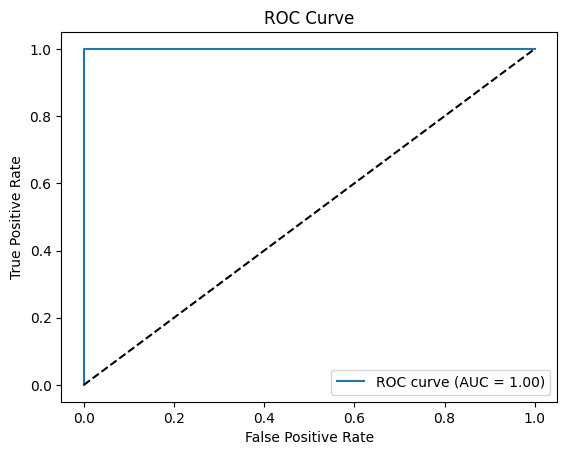

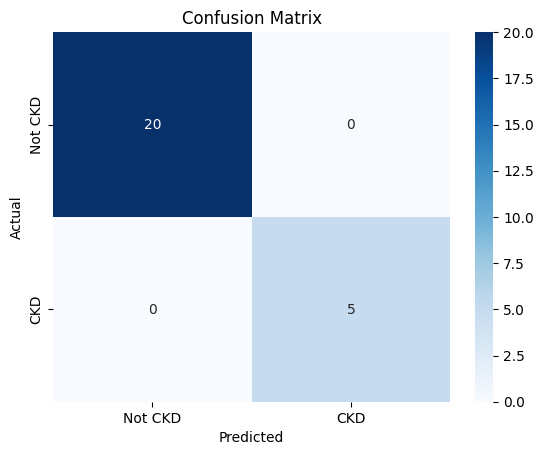

In [ ]:
# Convert to Pandas for visualization
pdf = predictions.select("label", "prediction").toPandas()

from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ROC Curve
fpr, tpr, _ = roc_curve(pdf['label'], pdf['prediction'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(pdf['label'], pdf['prediction'])

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not CKD", "CKD"], yticklabels=["Not CKD", "CKD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


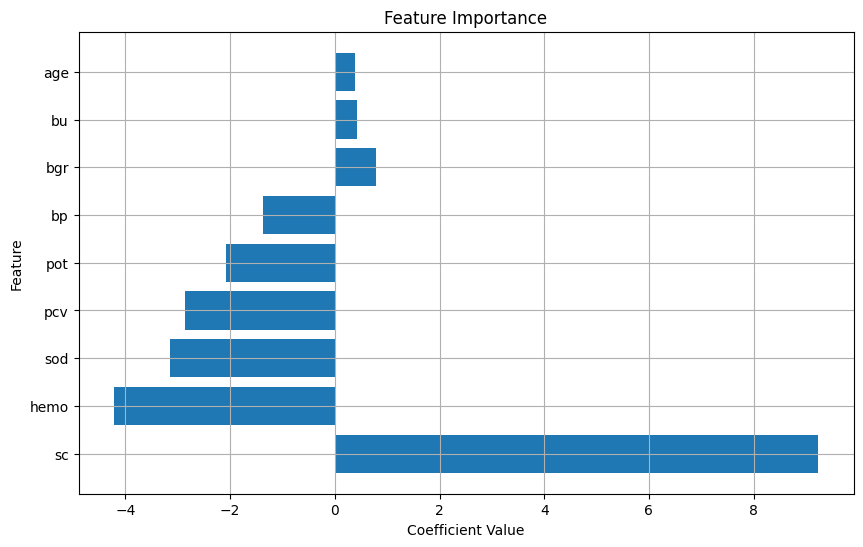

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Access logistic regression model's coefficients
coefficients = model.coefficients.toArray()
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients
}).sort_values(by='Importance', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


In [ ]:
!pip install plotly
import plotly.express as px

px.histogram(df.toPandas(), x="age", color="label", title="Age Distribution by CKD Status")


In [ ]:
predictions.select("features", "label", "prediction").toPandas().to_csv("ckd_predictions.csv", index=False)


In [ ]:
from google.colab import files
files.download("ckd_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions.select("features", "label", "prediction").toPandas().head(25)


,features,label,prediction
0,"[15.0, 80.0, 93.0, 17.0, 0.9, 136.0, 3.9, 16.7...",0,0.0
1,"[22.0, 60.0, 97.0, 18.0, 1.2, 138.0, 4.3, 13.5...",0,0.0
2,"[23.0, 80.0, 70.0, 36.0, 1.0, 150.0, 4.6, 17.0...",0,0.0
3,"[25.0, 80.0, 121.0, 19.0, 1.2, 142.0, 4.9, 15....",0,0.0
4,"[30.0, 80.0, 89.0, 42.0, 0.5, 139.0, 5.0, 16.7...",0,0.0
5,"[32.0, 70.0, 100.0, 29.0, 1.1, 142.0, 4.5, 14....",0,0.0
6,"[34.0, 70.0, 87.0, 38.0, 0.5, 144.0, 4.8, 17.1...",0,0.0
7,"[37.0, 60.0, 111.0, 35.0, 0.8, 135.0, 4.1, 16....",0,0.0
8,"[42.0, 70.0, 75.0, 31.0, 1.2, 141.0, 3.5, 16.5...",0,0.0
9,"[42.0, 70.0, 93.0, 32.0, 0.9, 143.0, 4.7, 16.6...",0,0.0


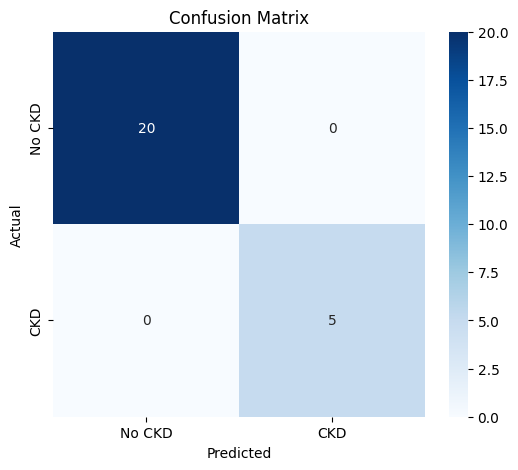

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predictions to a Pandas DataFrame for easy access
df_predictions = predictions.select("label", "prediction").toPandas()

# Create confusion matrix
cm = confusion_matrix(df_predictions["label"], df_predictions["prediction"])

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
